In [19]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from google.protobuf.json_format import MessageToDict
from PIL import Image , ImageDraw
# import utils
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
# print(MessageToDict)


### Memanggil mediapip untuk deteksi tangan 

In [20]:
# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

### Membaca foto tangan 

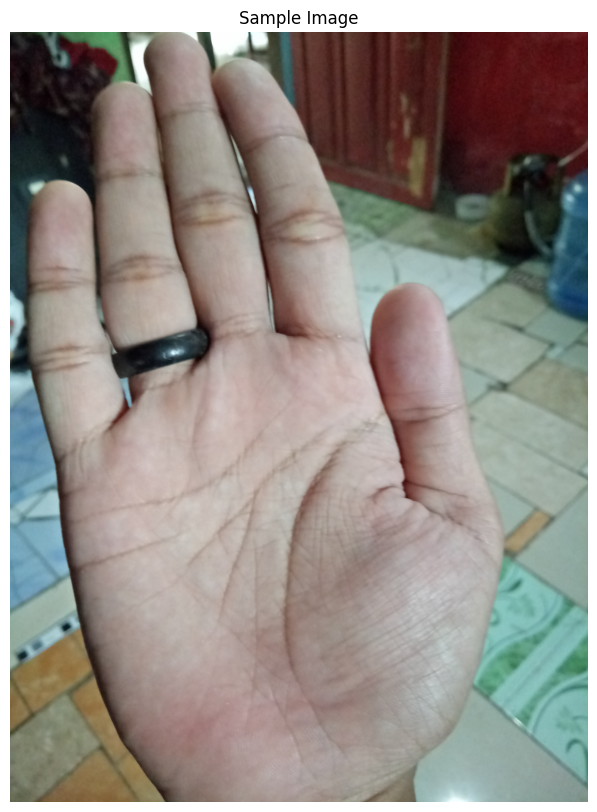

In [21]:
change_background_mp = mp.solutions.selfie_segmentation

change_bg_segment = change_background_mp.SelfieSegmentation()

# Reading the sample image on which we will perform the detection
sample_img = cv2.imread('tanganku.jpg')
# sample_img = cv2.imread('coba2.png')
sample_img = cv2.flip(sample_img, 1)

# Here we are specifing the size of the figure i.e. 10 -height; 10- width.
plt.figure(figsize = [10, 10])

# Here we will display the sample image as the output.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

# plt.figure(figsize = [10, 10])

# # plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()
# RGB_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# result = change_bg_segment.process(RGB_sample_img)
# plt.figure(figsize=[22,22])
# binary_mask = result.segmentation_mask > 0.9
# binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))
# output_image = np.where(binary_mask_3, sample_img, 255)  
# plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

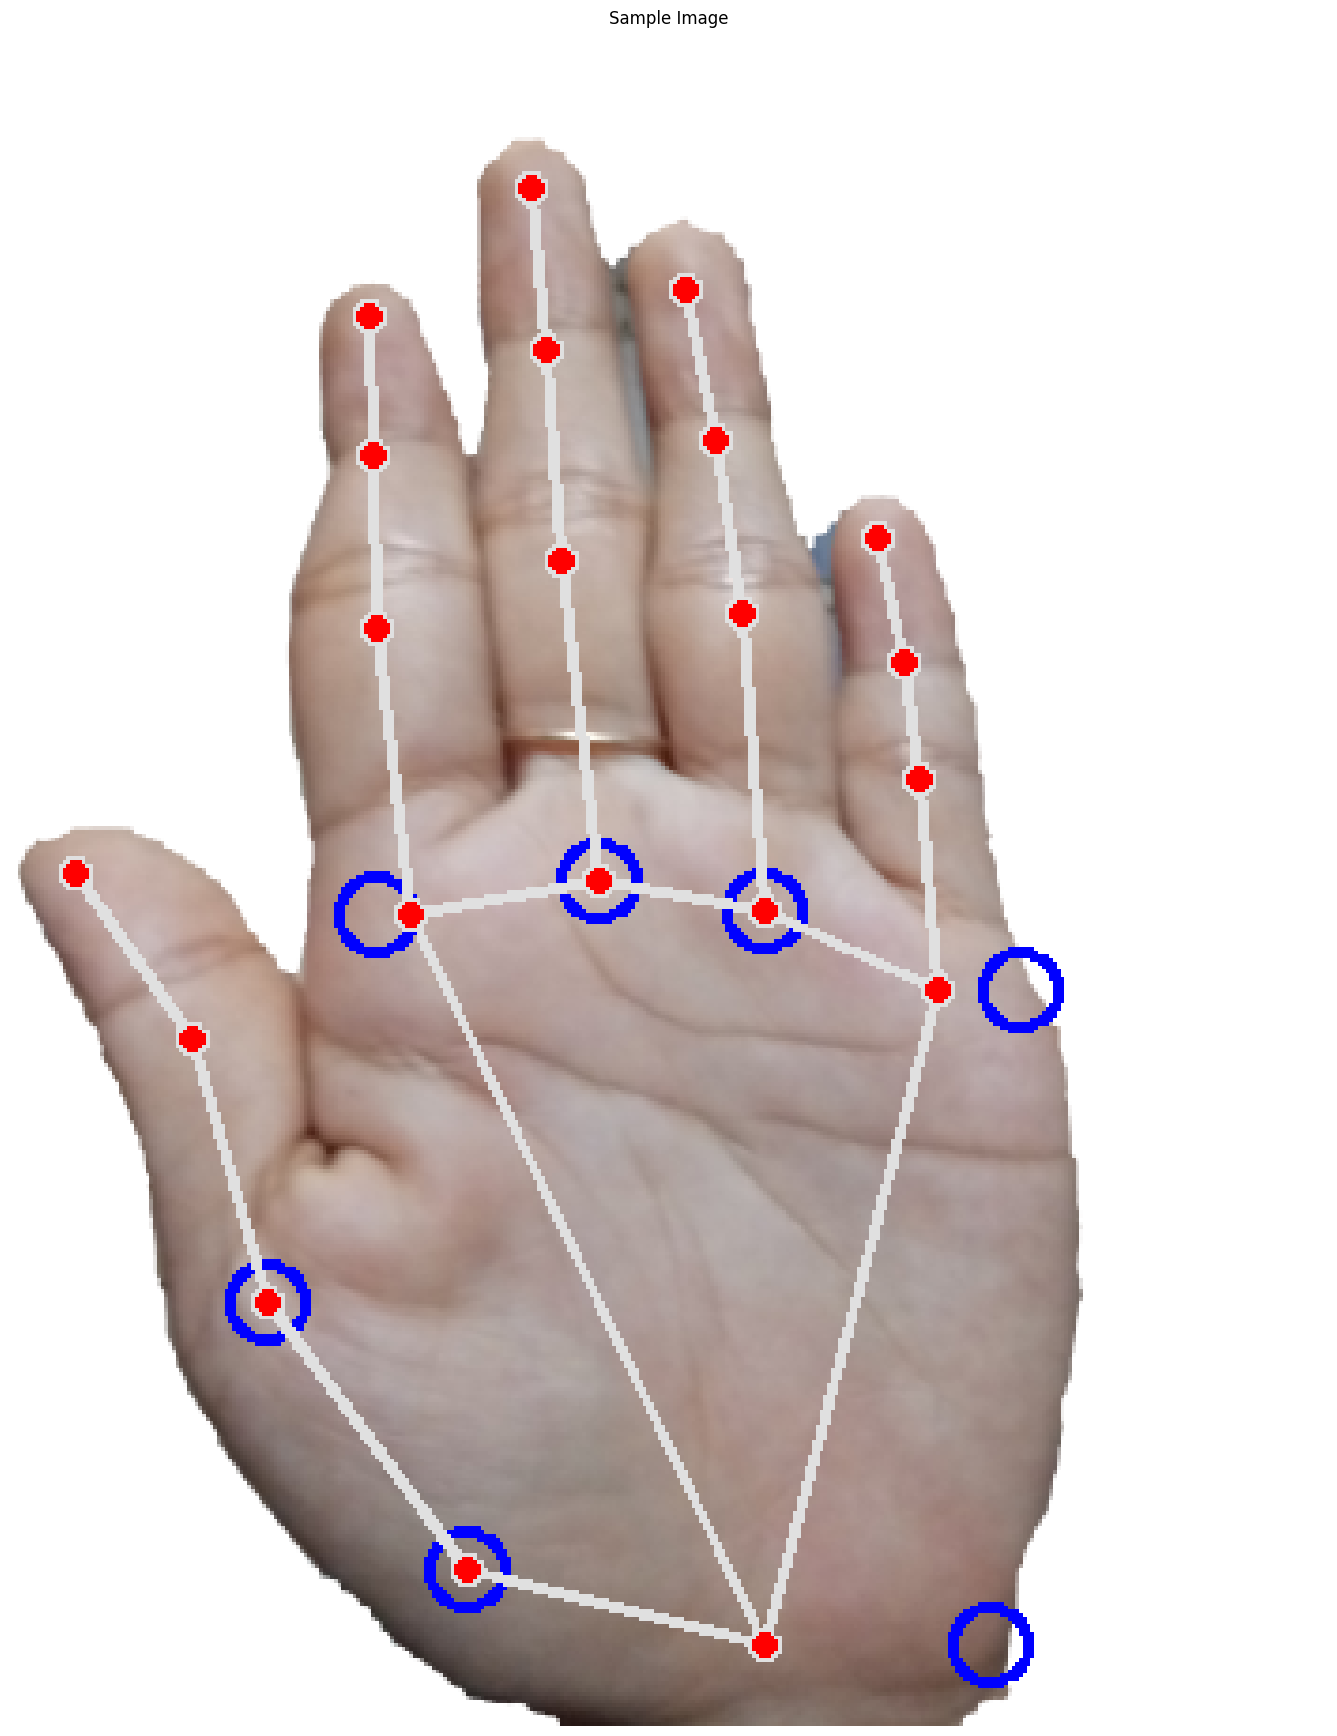

In [22]:
def makeCircle(img,circle_y,circle_x,radius):
    image_height, image_width, _ = img.shape
    y = int(circle_y * image_height)
    x = int(circle_x * image_width)
    circle_coordinates = (x,y)
    color = (255, 0, 0)
    thickness = 2
    return cv2.circle(img,circle_coordinates,radius,color,thickness)

image_file = 'tanganriska.jpg' #ini file yang akan digunakan

change_background_mp = mp.solutions.selfie_segmentation #untuk hapus background
change_bg_segment = change_background_mp.SelfieSegmentation() #untuk hapus background


with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands: 
    
    image = cv2.flip(cv2.imread(image_file), 1)
    sample_img = cv2.flip(cv2.imread(image_file), 1)
    
    width = 350
    height = 450
    dim = (width, height)

    image = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    image = change_bg_segment.process(image)
    image = image.segmentation_mask > 0.9
    image = np.dstack((image,image,image))
    image = np.where(image, sample_img, 255) 
    
    shape = image.shape
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image_height, image_width, _ = image.shape
    
    annotated_image = image.copy()
    circle_coordinates = None
    
    for hand_landmarks in results.multi_hand_landmarks:
        circle_coordinates1 = [
        [
            int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * shape[0]),
        ],
        [
            int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * shape[0]),
        ],
        [
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * shape[0]),
        ],
        [
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * shape[0]),
        ],
        [
            int((hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x  - hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x /2.5) * shape[1]) ,
            int(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * shape[0]),
        ],
        [
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * shape[0]),
        ],
        [
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * shape[0]),
        ],
        ]
        
        circle_coordinates = [
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x
        ],
        [   
            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y ,
            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x - hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x/5
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x  - hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x /2.5
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x
        ],
        ]
        
        for (circle_y,circle_x) in circle_coordinates:
          annotated_image = makeCircle(annotated_image,circle_y,circle_x,10)
        
        palm_center_y = (hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y +
        hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y)/2
        palm_center_x = (hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x +
        hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x)/2
        # sd
        palm_range = 100
        
        mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        hand_landmark_x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
        hand_landmark_y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
        
    img = cv2.flip(cv2.imread(image_file),1)
    sample_img = cv2.flip(cv2.imread(image_file),1)
    img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    img = change_bg_segment.process(img)
    plt.figure(figsize=[22,22])
    img = img.segmentation_mask > 0.9
    img = np.dstack((img,img,img))
    img = np.where(img, sample_img, 255)  
    pts = np.array(circle_coordinates1)

    ## (1) Crop the bounding rect
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = img[y:y+h, x:x+w].copy()

    ## (2) make mask
    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

    ## (3) do bit-op
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    ## (4) add the white background
    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    dst2 = bg+ dst


    cv2.imwrite("croped.png", croped)
    cv2.imwrite("mask.png", mask)
    cv2.imwrite("dst.png", dst)
    cv2.imwrite("dst2.png", dst2)
#     cv2.imwrite(
#         '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
#     plt.title("Sample Image");plt.axis('off');plt.imshow("img" + str(idx),cv2.flip(annotated_image,1));plt.show()
#     cv2.imshow("img" + str(idx),cv2.flip(annotated_image,1))
    plt.title("Sample Image");plt.axis('off');plt.imshow(cv2.flip(annotated_image,1)[:,:,::-1]);plt.show()
    cv2.waitKey(0)

In [23]:
# image_height, image_width, _ = sample_img.shape

# if results.multi_hand_landmarks:
    
#     for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            
#         print(f'HAND NUMBER: {hand_no+1}')
#         print('-----------------------')
        
#         for i in range(2):

#             print(f'{mp_hands.HandLandmark(i).name}:') 
#             print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
#             print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
#             print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}\n')

In [24]:
# img_copy = sample_img.copy()

# if results.multi_hand_landmarks:
# #     print(results.multi_hand_landmarks)
#     for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
#         mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
#                                   connections = mp_hands.HAND_CONNECTIONS)
       
#     fig = plt.figure(figsize = [50, 50])
 
#     plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()
    
#     for i in results.multi_handedness:
               
#         # Return whether it is Right or Left Hand
#         label = MessageToDict(i)[
#             'classification'][0]['label']

#         if label == 'Left':

#             print("Ini telapak tangan kiri")

#         if label == 'Right':

#             print("Ini telapak tangan kanan")

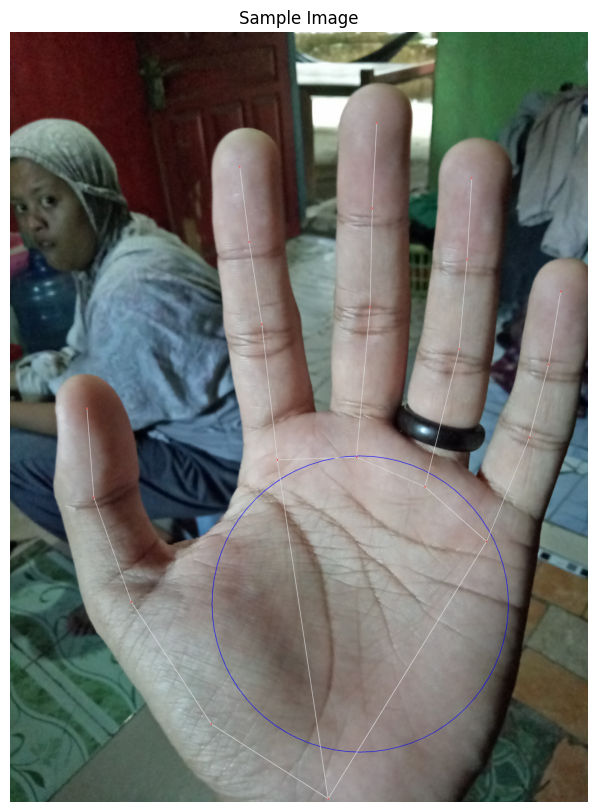

In [35]:
def makeCircle(img,circle_y,circle_x,radius):
    image_height, image_width, _ = img.shape
    y = int(circle_y * image_height)
    x = int(circle_x * image_width)
    circle_coordinates = (x,y)
    color = (255, 0, 0)
    thickness = 2
    return cv2.circle(img,circle_coordinates,radius,color,thickness)

# For static images:
IMAGE_FILES = [
   'aran.jpg',
]

change_background_mp = mp.solutions.selfie_segmentation

change_bg_segment = change_background_mp.SelfieSegmentation()


with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    sample_img = cv2.flip(cv2.imread(file), 1)
    width = 350
    height = 450
    dim = (width, height)
#     image = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
#     image = change_bg_segment.process(image)
#     plt.figure(figsize=[22,22])
#     image = image.segmentation_mask > 0.9
#     image = np.dstack((image,image,image))
#     image = np.where(image, sample_img, 255)  
#     image = utils.remove_bground(image)


#     # resize image's height 600 fixing the ratio
#     image = utils.ResizeWithAspectRatio(image,height=600)
#     image = image.resize((200,400))
    shape = image.shape
#     image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#     print("results:",results)
#     Print handedness and draw hand landmarks on the image.
#     print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    circle_coordinates = None
    for hand_landmarks in results.multi_hand_landmarks:
#         print('hand_landmarks:', hand_landmarks)
#         print(
#           f'Index finger tip coordinates: (',
#           f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
#           f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
#         )
        

        circle_coordinates1 = [
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * shape[0]),
        ],
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * shape[0]),
        ],
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * shape[0]),
        ],
        [
#             (hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y + hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y)/2,
#             (hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x + hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x)/2
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * shape[0]),
        ],
        [
#             hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y,
#             hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x
            int((hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x  - hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x /2.5) * shape[1]) ,
            int(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * shape[0]),
        ],
        [
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y,
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * shape[0]),
        ],
        [
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y,
#             hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * shape[1]),
            int(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * shape[0]),
        ],
        ]
        
        circle_coordinates = [
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x
        ],
        [   
            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y ,
            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x - hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x/5
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x  - hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x /2.5
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x
        ],
        [
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y,
            hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x
        ],
        ]

#         for (circle_y,circle_x) in circle_coordinates:
#           annotated_image = makeCircle(annotated_image,circle_y,circle_x,10)

        palm_center_y = (hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y +
        hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y)/2.1
        palm_center_x = (hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x +
        hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x)/2.1
        #
        palm_range = 100
        myradius = int(image_height/5.2)
        annotated_image = makeCircle(annotated_image,palm_center_y,palm_center_x,myradius)

        y = int(palm_center_y * image_height)
        x = int(palm_center_x * image_width)
        circle_coordinates = (x,y)
#         color = (255, 0, 0)
#         thickness = 2
        mask = np.zeros(image.shape, dtype=np.uint8)
        cv2.circle(mask, (x,y), myradius, (255,255,255), -1)
        ROI = cv2.bitwise_and(image, mask)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        x,y,w,h = cv2.boundingRect(mask)
        result = ROI[y:y+h,x:x+w]
        mask = mask[y:y+h,x:x+w]
        result[mask==0] = (255,255,255)
        cv2.imwrite("croped1.png", result)
#         cv2.imshow('result', result)

        mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        hand_landmark_x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
        hand_landmark_y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height

#     print(circle_coordinates)
    
    img = cv2.flip(cv2.imread("tanganriska.jpg"),1)
    sample_img = cv2.flip(cv2.imread("tanganriska.jpg"),1)
    img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    img = change_bg_segment.process(img)
    plt.figure(figsize=[10,10])
    img = img.segmentation_mask > 0.9
    img = np.dstack((img,img,img))
    img = np.where(img, sample_img, 255)  
    pts = np.array(circle_coordinates1)

    ## (1) Crop the bounding rect
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = img[y:y+h, x:x+w].copy()

    ## (2) make mask
    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

    ## (3) do bit-op
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    ## (4) add the white background
    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    dst2 = bg+ dst


    cv2.imwrite("croped.png", croped)
    cv2.imwrite("mask.png", mask)
    cv2.imwrite("dst.png", dst)
    cv2.imwrite("dst2.png", dst2)
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
#     plt.title("Sample Image");plt.axis('off');plt.imshow("img" + str(idx),cv2.flip(annotated_image,1));plt.show()
#     cv2.imshow("img" + str(idx),cv2.flip(annotated_image,1))
    plt.title("Sample Image");plt.axis('off');plt.imshow(cv2.flip(annotated_image,1)[:,:,::-1]);plt.show()
    cv2.waitKey(0)


In [47]:
# import cv2
# import numpy as np
 
# original = cv2.imread("croped.png")
# img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
# cv2.imwrite("grey.png", img)

# img = cv2.equalizeHist(img)
# cv2.imwrite("equalize.png", img)

# img = cv2.GaussianBlur(img, (9, 9), 0)
# cv2.imwrite("blur.png", img)

# img = cv2.Canny(img, 30, 80)
# cv2.imwrite("canny.png", img)

# lined = np.copy(original) * 0
# lines = cv2.HoughLinesP(img, 1, np.pi / 180, 15, np.array([]), 50, 20)
# for line in lines:
#     for x1, y1, x2, y2 in line:
#         cv2.line(lined, (x1, y1), (x2, y2), (0, 0, 255))
# cv2.imwrite("lined.png", img)

# output = cv2.addWeighted(original, 0.8, lined, 1, 0)
# cv2.imwrite("output.png", img)
# image = cv2.imread("output.png")
# image = ~image
# cv2.imwrite("img_inv.png",image)

In [36]:
import cv2
image = cv2.imread("croped1.png")
width = 450
height = 450
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
# cv2.imshow("palm",image) #to view the palm in python
cv2.waitKey(0)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,30,45,apertureSize = 3)
# cv2.imshow("edges in palm",edges)
# cv2.waitKey(0)
edges = cv2.bitwise_not(edges)
# cv2.imshow("edges in palm",edges)
cv2.imwrite("croped11.png", edges)
cv2.waitKey(0)

-1

In [52]:
import cv2
import os
import json

TARGET_FILE = 'hehe.png'
IMG_DIR = 'images/'
IMG_SIZE = (450, 450)

# target_img_path = IMG_DIR + TARGET_FILE
target_img = cv2.imread(TARGET_FILE)
target_img = cv2.resize(target_img, IMG_SIZE)
target_hist = cv2.calcHist([target_img], [0], None, [256], [0, 256])

print('TARGET_FILE: %s' % (TARGET_FILE))

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
# detector = cv2.ORB_create()
detector = cv2.AKAZE_create()
(target_kp, target_des) = detector.detectAndCompute(target_img, None)

# print('TARGET_FILE: %s' % (TARGET_FILE))
hasil_ramalan = None

datas = None

with open('dataset.json') as f:
  datas = json.load(f)

pilihan = 2000
image_ramalan = None
files = os.listdir(IMG_DIR)
for file in files:
#     if file == '.DS_Store' or file == TARGET_FILE:
#         continue
    
    comparing_img_path = IMG_DIR + file
    try:
        comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
        comparing_img = cv2.resize(comparing_img, IMG_SIZE)
        (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
        matches = bf.match(target_des, comparing_des)
        dist = [m.distance for m in matches]
        ret = sum(dist) / len(dist)
    except cv2.error:
        ret = 100000

    print(file, ret)
    if(ret < pilihan):
        pilihan =ret
        image_ramalan = file
        
print(pilihan)
print(image_ramalan)
theindex = None
for index,data in enumerate(datas):
    if(data["id"] == image_ramalan):
        theindex= index
        
hasil_ramalan = datas[theindex]['datanya']
print(hasil_ramalan)

TARGET_FILE: hehe.png
1.png 86.29166666666667
2.png 93.9453125
3.png 91.75520833333333
86.29166666666667
1.png
Garis kehidupan anda yang panjang menunjukkan anda seorang yang lincah dan penuh semangat.
Garis nasib anda yang tumbuh dari garis pikiran menandakan bahwa anda akan memperoleh nafkah dari bidang seni atau pendidikan seperti seniman, artis, sarjana atau para guru.
Garis pikiran anda berada di tengah yang menunjukkan garis pikiran yang standar yang naninya akan berkarir biasa dan mendapat pencapaian biasa dalam kehidupan.
Garis cinta yang sedang menunjukkan anda memiliki kehidupan cinta yang biasa-biasa saja
